<header style="padding:10px;background:#f9f9f9;border-top:3px solid #00b2b1"><img id="Teradata-logo" src="https://www.teradata.com/Teradata/Images/Rebrand/Teradata_logo-two_color.png" alt="Teradata" width="220" align="right" />

<p style = 'font-size:28px;font-family:Arial;color:#E37C4D'><b>Analyzing Customer Sentiment using Vantage Advanced SQL Functions</b></p>
<hr>
    

<br>

<b style = 'font-size:24px;font-family:Arial;color:#E37C4D'>Utilize native Vantage capabilities for Text Analytics for performance at extreme scale</b>

<p style = 'font-size:16px;font-family:Arial'>Sentiment Analysis is defined as the process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer's attitude towards a particular topic, product, etc. is positive, negative, or neutral.</p>

<p style = 'font-size:16px;font-family:Arial'>Many sentiment analysis tools exist, but most of them cannot perform flexibly enough and at a scale that allows the ability to deploy these insights to <b>all</b> types of use cases including real-time, high concurrency, or extreme volume</p> 

<p style = 'font-size:16px;font-family:Arial'>Teradata Vantage native Natural Langyage Analysis functions, combined with whole-data set statistical analysis; can provide deep insights into natural language intent, patterns, and author sentiment at extreme scale, speed, and concurrency.</p> 
<hr>

<b style = 'font-size:24px;font-family:Arial;color:#E37C4D'>Live Demonstration</b>

<p style = 'font-size:16px;font-family:Arial'>The following demonstration will illustrate how simple it is to utilize these native functions to understand customer sentiment, and measure the accuracy of machine-generated predictions.</p>

<p style = 'font-size:16px;font-family:Arial'>Additionally, since Vantage supports client tools and applications ranging from the most modern programmatic APIs such as Python, REST, and R; to traditional dashboards, BI tools, and analytics via SQL, a virtually unlimited number and types of users and applications can consume the results of this deep analysis; effectively democratizing specialized analytics to the widest possible audience.</p>

<p style = 'font-size:16px;font-family:Arial'>The data for this demonstration consists of Amazon Fine Foods Reviews, which can be found <a href = 'https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews'>here</a>.  The Demonstration below consists of three steps:</p>

<ol style = 'font-size:16px;font-family:Arial'>
    <li>Analyze the raw data set, including customer rating values</li>
    <li>Execute native Sentiment Analysis function and inspect the output</li>
    <li>Analyze the results and compare to the author rating</li>
    </ol>
    
<img src = 'Flow_Diagram_Sentiment.png' width = 100%>

<hr>
<p style = 'font-size:20px;font-family:Arial;color:#E37C4D'><b>Step 1 - Analyze the original data set</b></p>

<p style = 'font-size:16px;font-family:Arial'>Here, we will inspect the original data set, and perform some analysis on customer-provided ratings values.</p>

<p style = 'font-size:16px;font-family:Arial'><b>Optional</b> create reviews table and load source data from csv.</p>

<ol style = 'font-size:16px;font-family:Arial'>
    <li>Inspect the rows of the table</li>
    <li>Analyze the distribution of ratings</li>
    <li>Visualize the results</li>
    </ol>

In [1]:
%connect Vantage-LIVE

Success: 'Vantage-LIVE' connection established and activated for user 'ks250119'


<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'>1.1 - Inspect the Data</p>

<p style = 'font-size:16px;font-family:Arial'>Simple SQL queries to show the data - counts, ranges, content.</p>

In [2]:
select count(*), min(Score) as MinValue, max(Score) as MaxValue from "TRNG_KAGGLE"."AMZ_FINE_FOOD_REVIEWS";
select * from "TRNG_KAGGLE"."AMZ_FINE_FOOD_REVIEWS" sample 5;

,Count(*),MinValue,MaxValue
1,568454,1,5


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,ReviewTime,ReviewSummary,ReviewText
1,7168,B000LKYVZE,A2NMQWBDWT3SQF,Lorel Shea,5,5,5,2008-11-25,SOOO GOOD!,"My family has been enjoying Bug Bites organic chocolates for years. I highly recommend both the milk chocolate and the dark chocolate varieties. They are very smooth and rich, and not the least bit ""waxy"" tasting like some of the more popular American chocolates. Each individually packaged bite is the perfect size for an adult and maybe a little more than a mouthful for a young child. Each tiny package contains a special treat- a tiny insect card which features a color photograph and interesting facts. If you have a budding entomologist on your hands, these are the perfect treat! The Endangered Species company is environmentally conscious too, and dedicates 10% of their net profit to support species and habitat preservation."
2,324536,B004BAKDYI,A1RLLTUBCFQV22,Paula the Gourmet,1,1,3,2011-09-25,"Flavor is ok, but Aunt Gussie's is a lot better","I am a diabetic and appreciate an occasional ""sweet"" treat. These cookies are very dry and thin (yes, they are meant for dipping in a hot liquid) compared to Aunt Gussie's sugar free biscotti.I have to add a spread to enjoy it--sugar free jam or margarine."
3,233394,B007TJGZ4A,AKX0GK73F2XVE,SUNNY SYL,0,0,4,2012-07-23,"Mild coffee but has nice, not bitter or artificial taste",Bought this for my daughter who loved flavored coffees. This is a good one. Add a few drops of real vanilla extract and it is outstanding as well. Enjoy!
4,345846,B002QTXS5C,A2NJO6YE954DBH,Lawrance M. Bernabo,2,2,4,2006-08-25,Now we have the Oreo transformed into a baked chocolate wafer snack,"We are still six years away from the centennial for the Oreo cookie, which was first manufactured by Nabisco in 1912 as something more exciting for people to dip in their tea than the biscuits the English tend to use (it was copyrighted as the ""Oreo Biscuit""). The sandwich cookie was quite similar to the Hydrox cookie produced by Sunshine, but Oreo dominated the market to such an extent that they stopped making Hydrox back in 1996. What would be considered the ""modern"" Oreo cookie was developed in 1952 (originally they were mound shaped, which is why some think the name comes from the Greek word for ""hill""), with the two circular chocolate wafers with the sweet white filling commonly called the ""cream"" in between.Of course today consumers do not have to restrict themselves to just the tradition Oreo cookie. There are Oreos with chocolate-flavored cream instead of the traditional white, as well as orange colored cream at Halloween and red at Christmas. You can get Oreos with a double portion of filling, not to mention mixing and matching two flavors of filling (carmel and chocolate, coffee and cream, peanut butter and chocolate, etc.). You want the original cookie with a coating of chocolate fudge? They have that, or with white chocolate fudge in winter, and then there is the Uh-Oh! Oreo with the flavors of the cookie reversed.But what if you are interested in watching your weight because once you open a bag of which ever type of Oreos are your personal preference they are just sitting them beginning to be eating? After all, once they are open they could go stale, and putting them in a cookie jar just makes them more accessible even if it allays fears about freshness. Nabisco has taken a three-prong approach for weight watching Oreo lovers. You can go with the Reduced Fat Oreo, which is identical to the size of the original but has less fat per serving. Then there are the Mini Oreos, bite-sized versions packaged in snack packs rather than in really think wrapped trays. Now we can add to that short list the Oreo Thin Crisps.These are baked chocolate six-sided wafer snacks, almost 20 to a pack, that are lightly sprinkled with white specks that are to take the place of the aforementioned cream. Now, I am someone who likes the crea

<p style = 'font-size:16px;font-family:Arial'>We have 500K reviews, rating from 1 to 5.</p>

<hr>
<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'>1.2 Analyze the distribution of author ratings</p>

<p style = 'font-size:16px;font-family:Arial'>Create a simple aggregation query to calculate distribution</p>

In [3]:
SELECT Score, count(Score) as CountOfValues
FROM "TRNG_KAGGLE"."AMZ_FINE_FOOD_REVIEWS"
GROUP BY 1 
ORDER BY 1

,Score,CountOfValues
1,1,52268
2,2,29769
3,3,42640
4,4,80655
5,5,363122


<hr>
<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'>1.3 Visualize the results</p>

<p style = 'font-size:16px;font-family:Arial'>Chart the results with a simple bar plot</p>

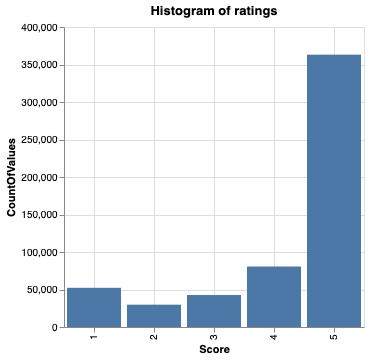

In [5]:
%chart x=Score, y=CountOfValues, title=Histogram of ratings, height=300, width=300

<hr>

<p style = 'font-size:20px;font-family:Arial;color:#E37C4D'><b>Step 2- Use Sentiment Extractor to calculate the sentiment score</b></p>

<p style = 'font-size:16px;font-family:Arial'>Steps are as follow:</p>
<ol style = 'font-size:16px;font-family:Arial'>
    <li>Call the TD_SentimentExtractor function on reviews data</li>
    <li>Inspect the Results</li>
    <li>Create a new table that can be used for analysis later</li>
    </ol>

<p style = 'font-size:16px;font-family:Arial'>The TD_SentimentExtractor function uses a dictionary model to extract the sentiment (positive, negative, or neutral) of each input document or sentence.</p>

<p style = 'font-size:16px;font-family:Arial'>The function handles negated sentiments as follows:</p>

<ul style = 'font-size:16px;font-family:Arial'>
    <li>-1 if the sentiment is negated (for example, "I am not happy")</li>
    <li>-1 if the sentiment and a negation word are separated by one word (for example, "I am not very happy")</li>
    <li>+1 if the sentiment and a negation word are separated by two or more words (for example, "I am not saying I am happy")</li>
    </ul>
<hr>   
<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'>2.1 TD_SentimentExtractor Syntax</p>

<p style = 'font-size:16px;font-family:Arial'>TD_SentimentExtractor Syntax follows the Teradata SQL_MR conventions that take an InputTable and optional Dimension Table in the ON clause, followed by function parameters.  See the <a href = 'https://docs.teradata.com/r/Teradata-VantageTM-Advanced-SQL-Engine-Analytic-Functions/April-2022/Advanced-SQL-Engine-Analytic-Functions/TD_SentimentExtractor'>documentation</a> for more details.</p>

In [3]:
SELECT TOP 5 * FROM TD_SentimentExtractor (
    ON "TRNG_KAGGLE"."AMZ_FINE_FOOD_REVIEWS" AS INPUTTABLE PARTITION BY ANY
    USING
        TextColumn ('ReviewText')
        AnalysisType ('DOCUMENT')
        Accumulate('ReviewText')
) as dt;

,ReviewText,polarity,sentiment_score,sentiment_words
1,Very good but too early to give final rating until we try other beans,POS,2,"In total, positive score:1 negative score:0. good 1 (1)."
2,The count was obscure so I ordered too many. I'll have Halloween leftovers. LOLEach bag contains 19 candy bars. Each of the small candy bar wrappers contains one piece of candy.So at 19 bars per bag and six bags you get 114 bars!,NEG,2,"In total, positive score:0 negative score:-1. obscure -1 (1)."
3,"I have never had chili out of a can that tasted this great, it's flavorful, it's spicy, but not too spicy, it has chicken, beans, chilies, tastes like their maybe some roasted red pepper in there. I like to put tortilla chips on the bottom of the bowl, pour the chili on top and then garnish with sour cream, cheese,and salsa Verde. Delish!",POS,2,"In total, positive score:4 negative score:-1. great 1 (1), sour -1 (1), like 1 (2), top 1 (1)."
4,"I've tried this out, and honestly it's far more cost effective to pick up some organic (or heck, even regular) peanut butter from the grocery.I find filling the toys up with the peanut butter & freezing them for 10-15 minutes is an ideal way to keep the fur babies busy.",NEU,0,"In total, positive score:2 negative score:-2. effective 1 (1), freezing -1 (1), ideal 1 (1), heck -1 (1)."
5,"I tried poison, hose down the hole, gassing...all of which gave no dead body in return, and mounds kept showing up regularly. So after some research and a word of advice from a friend, I found these traps. I read the reviews and ordered two.I set one on early Friday morning in my front yard, following the instructions given by one of the posts. Woke up this morning, checked it, and caught that sucker. I checked the backyard after feeling victorious and noticed a fresh mound. So, feeling confident, I dug around a bit, found the tunnel, set the second trap. Caught the second one within an hour. I live in regular ole suburbia with a normal size front & backyard. So these can work just fine without tearing up your grass too bad.These traps are fantastic. HIGHLY recommended.",POS,2,"In total, positive score:8 negative score:-3. recommended 1 (1), fresh 1 (1), victorious 1 (1), fantastic 1 (1), trap -1 (1), confident 1 (1), poison -1 (1), sucker -1 (1), fine 1 (1), work 1 (1), no dead 1 (1)."


<hr>
<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'>2.2 TD_SentimentExtractor Output</p>

<p style = 'font-size:16px;font-family:Arial'>The function outputs three new columns (in addition to the columns declared in the Accumulate parameter.</p>

<ul style = 'font-size:16px;font-family:Arial'>
    <li><b>content</b>  The column contains the sentence extracted from the document. The column displays if you use Sentence as the AnalysisType.</li>
    <li><b>polarity</b>  The sentiment value of the result. Possible values are POS (positive), NEG (negative), or NEU (neutral)Possible values are POS (positive), NEG (negative), or NEU (neutral)</li>
    <li><b>sentiment_score</b>  The sentiment score of polarity. Possible values are 0 (neutral), 1 (higher than neutral), or 2 (higher than 1)</li>
    <li><b>sentiment_words</b>  The string that contains a total positive score, total negative score, and sentiment words with their polarity_strength and frequency enclosed in parenthesis.</li>
    </ul>
    
<hr>
<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'>2.3 Create a permanent table with results</p>
<p style = 'font-size:16px;font-family:Arial'><b>(Table and view creation isn't currently working as of 01-SEP-22 - the rest of the demo uses subselects)</b>Note we accumulate the original id, review and rating columns, so we can compare the calculated values to the ratings provided by the author.</p>

In [7]:
/*
CREATE VIEW SentimentExtractor_output_V as(
    SELECT TOP 5 * FROM TD_SentimentExtractor (
        ON "TRNG_KAGGLE"."AMZ_FINE_FOOD_REVIEWS" AS INPUTTABLE PARTITION BY ANY
    USING
    TextColumn ('ReviewText')
    AnalysisType ('DOCUMENT')
    Accumulate('id','ReviewText','Score') --retain the original columns
    ) AS dt 
);
*/

ERROR: Unable to run SQL: Unable to run SQL query: Database reported error:3610:Internal error: Please do not resubmit the last request.  SubCode, CrashCode: 0, 0

In [199]:
/*
SELECT TOP 5 * FROM SentimentExtractor_output_V
*/

,doc_id,review,rating,polarity,sentiment_score,sentiment_words
1,343339,"Holy moly, this stuff is delicious! These bars taste like Starbucks pumpkin loaf but with about half the calories and twice as filling. I'm so glad I found these gems!",5,POS,2,"In total, positive score:5 negative score:0. gems 1 (1), Holy 1 (1), delicious 1 (1), glad 1 (1), like 1 (1)."
2,292767,"I wanted to buy some baking soda, and not baking powder. I kept it for future sake baking but I think a warning, or a visible statement for the customers not make the confusion. For example: ""*Consumer aware: THIS PRODUCT IS BAKING POWDER, NOT BAKING SODA!!!"" or something like that. ///",3,NEG,2,"In total, positive score:1 negative score:-2. warning -1 (1), confusion -1 (1), like 1 (1)."
3,318053,This is great stuff and makes the best jerky. I use it all the time and the flavor is awesome.,5,POS,2,"In total, positive score:3 negative score:-1. best 1 (1), awesome 1 (1), jerky -1 (1), great 1 (1)."
4,447501,I started using Nutiva at a local vitamin shop. Saw these at Amazon at half the price. I like the individual packages over the larger containers. Very pleased with quality and price.,5,POS,2,"In total, positive score:2 negative score:0. pleased 1 (1), like 1 (1)."
5,472787,Have been using Core products for several years. I supplement dry food with a little canned food and I prefer grain free for my dogs. I've priced compared in several locations and I have not found a better deal anywhere else.,5,POS,2,"In total, positive score:3 negative score:0. prefer 1 (1), better 1 (1), free 1 (1)."


<hr>
<p style = 'font-size:20px;font-family:Arial;color:#E37C4D'><b>Step 3 - Analyze the results and compare to author rating</b></p>

<p style = 'font-size:16px;font-family:Arial'>Additional analytic and data processing functions can be used to provide deeper insights into model accuracy, or inform better tuning of the analytic process.  What follows are some examples:</p>

<ol style = 'font-size:16px;font-family:Arial'>
    <li>Create a sentiment polarity out of the author ratings</li>
    <li>Use Vantage Functions to analyze the classification accuracy of our model</li>
    <li>Create a ratings value out of sentiment score and polarity</li>
    <li>Calculate the distributions of ratings values and visualize results</li>
 </ol>

<hr>
<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'>3.1 Create a categorical representation of author ratings.</p>
<p style = 'font-size:16px;font-family:Arial'>For purposes of comparison, assume the ratings values can be categorized into Negative, Neutral, and Positive categories to match the output of the Sentiment Analysis function.</p>

In [14]:
/*
Assume that a rating of 1 or 2 is Negative, 3 is Neutral, and 4 or 5 is Positive
*/
SELECT TOP 5 id, Score, polarity, sentiment_score,
    CASE  
        WHEN Score<3 THEN 'NEG'
        WHEN Score=3 THEN 'NEU'
        WHEN Score>3 THEN 'POS'
    END AS rating_polarity
FROM (SELECT * FROM TD_SentimentExtractor (
        ON "TRNG_KAGGLE"."AMZ_FINE_FOOD_REVIEWS" AS INPUTTABLE PARTITION BY ANY
    USING
    TextColumn ('ReviewText')
    AnalysisType ('DOCUMENT')
    Accumulate('id','ReviewText','Score') --retain the original columns
    )as dt) se

,Id,Score,polarity,sentiment_score,rating_polarity
1,380228,4,POS,2,POS
2,425233,3,POS,2,NEU
3,205775,5,POS,2,POS
4,276066,5,POS,2,POS
5,481372,5,POS,2,POS


<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'>3.2 Using TD_ClassificationEvaluator</p>

<p style = 'font-size:16px;font-family:Arial'>In classification problems, a confusion matrix is used to visualize the performance of a classifier. The confusion matrix contains predicted labels represented across the row-axis and actual labels represented across the column-axis. Each cell in the confusion matrix corresponds to the count of occurrences of labels in the test data.  See the <a href = 'https://docs.teradata.com/r/Teradata-VantageTM-Advanced-SQL-Engine-Analytic-Functions/April-2022/Advanced-SQL-Engine-Analytic-Functions/TD_ClassificationEvaluator'>documentation</a> for more details.</p>

<p style = 'font-size:16px;font-family:Arial'>This function takes an input table (in this case, the query we developed above), an optional output table with additional metrics, and function parameters including the columns that ate to be compared.</p>

In [201]:
DROP TABLE additional_metrics_labels

ERROR: Unable to run SQL: Unable to run SQL query: Database reported error:3807:Object 'additional_metrics_labels' does not exist.

In [16]:
SELECT * FROM TD_ClassificationEvaluator(
ON (SELECT id, Score, polarity, sentiment_score,
    CASE  
        WHEN Score<3 THEN 'NEG'
        WHEN Score=3 THEN 'NEU'
        WHEN Score>3 THEN 'POS'
    END AS rating_polarity
FROM (SELECT * FROM TD_SentimentExtractor (
        ON "TRNG_KAGGLE"."AMZ_FINE_FOOD_REVIEWS" AS INPUTTABLE PARTITION BY ANY
    USING
    TextColumn ('ReviewText')
    AnalysisType ('DOCUMENT')
    Accumulate('id','ReviewText','Score') --retain the original columns
    )as dt) se) AS InputTable
OUT VOLATILE TABLE OutputTable(additional_metrics_labels)
USING
ObservationColumn('rating_polarity')
PredictionColumn('polarity')
NumLabels(3)
) AS du;

Success: 0 rows affected

,SeqNum,Prediction,Mapping,CLASS_1,CLASS_2,CLASS_3,Precision,Recall,F1,Support
1,0,NEG,CLASS_1,35322,7987,24317,0.5223139029367403,0.43056181966673573,0.47202047266191377,82037
2,1,NEU,CLASS_2,15455,6313,33819,0.11356971953874108,0.14805347091932458,0.12853899640628344,42640
3,2,POS,CLASS_3,31260,28340,385641,0.8661399107449673,0.8689972666451844,0.8675662360042202,443777


<p style = 'font-size:16px;font-family:Arial'>We can see in the above output, these assumptions seem to indicate better predictive capabilities at  positive sentiment and possible correlation to higher ratings.</p>

<p style = 'font-size:16px;font-family:Arial'>Additional metrics table can be queried from the OutputTable</p>

In [17]:
select * from additional_metrics_labels order by 1,2,3;

,SeqNum,Metric,MetricValue
1,1,Accuracy                                          ,0.751645691647873
2,2,Micro-Precision                                   ,0.751645691647873
3,3,Micro-Recall                                      ,0.751645691647873
4,4,Micro-F1                                          ,0.751645691647873
5,5,Macro-Precision                                   ,0.5006745110734828
6,6,Macro-Recall                                      ,0.48253751907708153
7,7,Macro-F1                                          ,0.48937523502413915
8,8,Weighted-Precision                                ,0.7600696796346277
9,9,Weighted-Recall                                   ,0.751645691647873
10,10,Weighted-F1                                       ,0.755047880457828


<hr>
<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'>3.3 Create a Numeric value of sentiment polarity and strength to compare with author rating value</p>

<p style = 'font-size:16px;font-family:Arial'>For another method of comparison, let's assume the calculated sentiment polarity and score can be combined to create a ratings value.  Positive and Negative polarity can score 1 or 2 in 'strength', and Neutral has a 0 strength value.</p>


In [19]:
SELECT TOP 5 id, polarity, sentiment_score,
    CASE polarity 
        WHEN 'POS' THEN sentiment_score+3
        WHEN 'NEG' THEN ABS(sentiment_score-3)
        WHEN 'NEU' THEN 3
    END AS calculated_rating,
    Score as author_rating
FROM (SELECT * FROM TD_SentimentExtractor (
        ON "TRNG_KAGGLE"."AMZ_FINE_FOOD_REVIEWS" AS INPUTTABLE PARTITION BY ANY
    USING
    TextColumn ('ReviewText')
    AnalysisType ('DOCUMENT')
    Accumulate('id','ReviewText','Score') --retain the original columns
    )as dt) se

,Id,polarity,sentiment_score,calculated_rating,author_rating
1,380228,POS,2,5,4
2,256347,POS,2,5,5
3,121332,NEG,2,1,5
4,276066,POS,2,5,5
5,481372,POS,2,5,5


In [205]:
/*
DROP TABLE ratings_comparison
*/

ERROR: Unable to run SQL: Unable to run SQL query: Database reported error:3807:Object 'ratings_comparison' does not exist.

In [21]:
/*
CREATE TABLE ratings_comparison AS (
    SELECT id, polarity, sentiment_score,
    CASE polarity 
        WHEN 'POS' THEN sentiment_score+3
        WHEN 'NEG' THEN ABS(sentiment_score-3)
        WHEN 'NEU' THEN 3
    END AS calculated_rating,
    Score as author_rating
FROM (SELECT * FROM TD_SentimentExtractor (
        ON "TRNG_KAGGLE"."AMZ_FINE_FOOD_REVIEWS" AS INPUTTABLE PARTITION BY ANY
    USING
    TextColumn ('ReviewText')
    AnalysisType ('DOCUMENT')
    Accumulate('id','ReviewText','Score') --retain the original columns
    )as dt) se
) WITH DATA
*/

ERROR: Unable to run SQL: Unable to run SQL query: Database reported error:3610:Internal error: Please do not resubmit the last request.  SubCode, CrashCode: 0, 0

<hr>
<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'>3.4 Visualize the results</p>

<p style = 'font-size:16px;font-family:Arial'>Aggregate and union the data to create an unpivoted table that can be easily charted.</p>

In [36]:
SELECT CAST(author_rating as CHAR(10)) as rating, count(author_rating) as CountOfValues, 'author' as rating_type
FROM (
    SELECT id, polarity, sentiment_score,
    CASE polarity 
        WHEN 'POS' THEN sentiment_score+3
        WHEN 'NEG' THEN ABS(sentiment_score-3)
        WHEN 'NEU' THEN 3
    END AS calculated_rating,
    Score as author_rating
FROM (SELECT * FROM TD_SentimentExtractor (
        ON "TRNG_KAGGLE"."AMZ_FINE_FOOD_REVIEWS" AS INPUTTABLE PARTITION BY ANY
    USING
    TextColumn ('ReviewText')
    AnalysisType ('DOCUMENT')
    Accumulate('id','ReviewText','Score') --retain the original columns
    )as dt) se) du
GROUP BY 1 

UNION

SELECT CAST(calculated_rating as CHAR(10)) as rating, count(calculated_rating) as CountOfValues, 'calc' as rating_type
FROM (
    SELECT id, polarity, sentiment_score,
    CASE polarity 
        WHEN 'POS' THEN sentiment_score+3
        WHEN 'NEG' THEN ABS(sentiment_score-3)
        WHEN 'NEU' THEN 3
    END AS calculated_rating,
    Score as author_rating
FROM (SELECT * FROM TD_SentimentExtractor (
        ON "TRNG_KAGGLE"."AMZ_FINE_FOOD_REVIEWS" AS INPUTTABLE PARTITION BY ANY
    USING
    TextColumn ('ReviewText')
    AnalysisType ('DOCUMENT')
    Accumulate('id','ReviewText','Score') --retain the original columns
    )as dt) se) du
GROUP BY 1 

,rating,CountOfValues,rating_type
1,1,46910,calc
2,1,52268,author
3,2,20716,calc
4,2,29769,author
5,3,42640,author
6,3,55587,calc
7,4,37115,calc
8,4,80655,author
9,5,363122,author
10,5,408126,calc


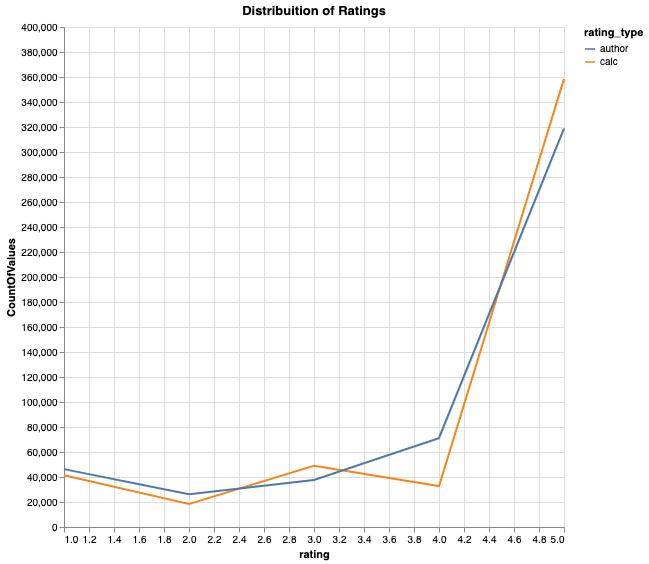

In [208]:
%chart x=rating, y=CountOfValues, groupingcol=rating_type, mark=line, title=Distribuition of Ratings, height=500, width=500


<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'>An observation</p>

<p style = 'font-size:16px;font-family:Arial'>Overlaying the calculated rating on top of the author rating shows an interesting potential conclusion at the most positive of ratings - the calculation <b>over</b>estimates ratings of five, but <b>under</b>estimates ratings of four.  Could this be due to natural resistance to rating things the 'best' even though they use very positive language?</p>

<p style = 'font-size:16px;font-family:Arial'>Another possible question to ponder on the other side of this; are users more willing to give a lower rating value, but moderate their language in their review?</p>

In [189]:
--Clean up all the tables we created above, except for the reviews table
--DROP TABLE ratings_comparison

Success: 19 rows affected

In [190]:
--DROP TABLE SentimentExtractor_output

Success: 20 rows affected

In [191]:
DROP TABLE additional_metrics_labels

Success: 0 rows affected

<footer style="padding:10px;background:#f9f9f9;border-bottom:3px solid #394851">©2022 Teradata. All Rights Reserved</footer>